In [ ]:
Projet de machine learning à travers une régression linéaire développer à partir
de jeu de donnée généré aléatoirement.

In [10]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

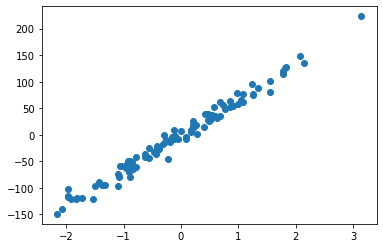

In [11]:
(x,y)= make_regression(n_samples=100,n_features=1,noise=10)
plt.scatter(x,y)

In [13]:
# 1) Je vérifie la taille de la matrice généré par mon dataset
print(x.shape)
y = y.reshape(100,1) #Pour bien généré la matrice y
print(y.shape)

(100, 1)
(100, 1)


In [15]:
# 2) Je génere ma Matrice de x et de 1
X = np.hstack((x,np.ones(x.shape)))
X

array([[-2.07445017,  1.        ],
       [ 0.51004971,  1.        ],
       [-0.43252457,  1.        ],
       [-0.88523214,  1.        ],
       [-1.909427  ,  1.        ],
       [ 0.6784656 ,  1.        ],
       [-0.46360047,  1.        ],
       [-1.06434865,  1.        ],
       [ 1.34296569,  1.        ],
       [ 0.1754817 ,  1.        ],
       [-0.60062351,  1.        ],
       [ 1.82899318,  1.        ],
       [-1.08629206,  1.        ],
       [ 0.97743035,  1.        ],
       [ 1.07610181,  1.        ],
       [ 0.39671737,  1.        ],
       [ 3.14038561,  1.        ],
       [ 1.54940125,  1.        ],
       [-0.4429125 ,  1.        ],
       [ 1.2619879 ,  1.        ],
       [-1.08540678,  1.        ],
       [ 0.00581522,  1.        ],
       [-1.09039891,  1.        ],
       [ 0.18230658,  1.        ],
       [ 0.84901329,  1.        ],
       [-1.97095331,  1.        ],
       [-0.82930153,  1.        ],
       [-0.12421453,  1.        ],
       [ 0.8519785 ,

In [20]:
# 3) Je génere de maniere aléatoire les valeurs a et b de ma matrice theta
theta = np.random.randn(2,1)
print(theta.shape)
theta

(2, 1)


array([[ 0.38192328],
       [-0.16690973]])

In [23]:
# 4) Je défini la fonction produit de X et Theta
def Model(X,theta):
    return X.dot(theta)

Model(X,theta) 

array([[-0.95919054],
       [ 0.02789013],
       [-0.33210093],
       [-0.50500049],
       [-0.89616435],
       [ 0.09221208],
       [-0.34396954],
       [-0.57340925],
       [ 0.34600013],
       [-0.09988918],
       [-0.39630183],
       [ 0.53162534],
       [-0.58178995],
       [ 0.20639367],
       [ 0.2440786 ],
       [-0.01539413],
       [ 1.03247664],
       [ 0.42484267],
       [-0.33606832],
       [ 0.31507283],
       [-0.58145184],
       [-0.16468876],
       [-0.58335845],
       [-0.0972826 ],
       [ 0.15734821],
       [-0.91966268],
       [-0.48363929],
       [-0.21435015],
       [ 0.15848069],
       [ 0.01880628],
       [-0.08599431],
       [-0.46705736],
       [-0.91601324],
       [-0.50623815],
       [ 0.01154566],
       [-0.46735798],
       [-0.51161335],
       [ 0.3081872 ],
       [ 0.05161652],
       [ 0.01453126],
       [-0.18448391],
       [ 0.65078873],
       [ 0.17686096],
       [ 0.04178585],
       [-0.5215695 ],
       [ 0

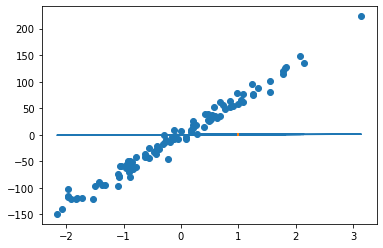

In [28]:
# 5) Jaffiche ma droite de regression par rapport à mon nuage de point
plt.scatter(x,y)
plt.plot(X,Model(X,theta))

In [38]:
# 6) Je définit ma fonction cout
def Cost_function(X,y,theta):
    m = len(y)
    return 1/(2*m) * np.sum((Model(X,theta)-y)**2)

Cost_function(X,y,theta)

2644.952654045303

In [40]:
# 7) Je définis la fonction de gradient
def grad(X,y,theta) :
    m=len(y)
    return 1/m * X.T.dot(Model(X,theta) - y)

In [51]:
# 8) Je définis la fonction de descente de gradient
def descente_gradient(X,y,theta,learning_rate,n_iterations) :
    cost_history = np.zeros(n_iterations) #permet d'afficher ma courbe de decsente de gradient
    for i in range(0,n_iterations):
        theta = theta - learning_rate * grad(X,y,theta)
        cost_history[i] = Cost_function(X,y,theta)
    return theta, cost_history


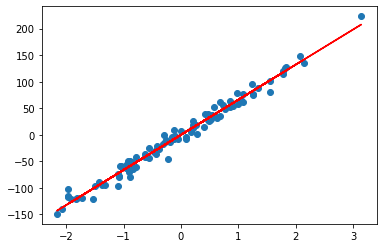

In [58]:
# Marchine learning
theta_final,cost_history = descente_gradient(X,y,theta,learning_rate=0.01,n_iterations=1000)
predictions = Model(X,theta_final)
plt.scatter(x,y)
plt.plot(x,predictions,c="r")

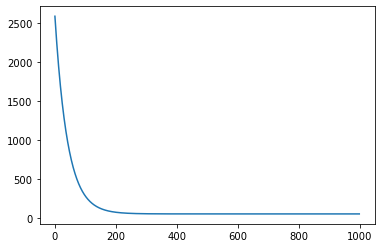

In [53]:
#Ma courbe de descente de gradient
plt.plot(range(1000),cost_history)

In [57]:
#Calcul de coef de determination
def coef_determination(y,predictions) :
    u = ((y - predictions)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - (u/v)
coef_determination(y,predictions)

0.9815335843835487